In [1]:
pip install --upgrade scikit-learn

##Import Dependecies

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

##Load Data and Split Data

In [3]:
#load data split into train and test
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_train.csv")

In [4]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')

In [5]:
#Letter categories for images
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  O


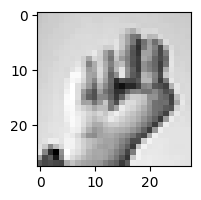

In [6]:
#Check to see if data pixels provide accurate shape
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray')
print("Label for the image is: ", categories[int(train_data[i,0])])

##Check to see if Data is unbalanced

Text(0.5, 1.0, 'Label')

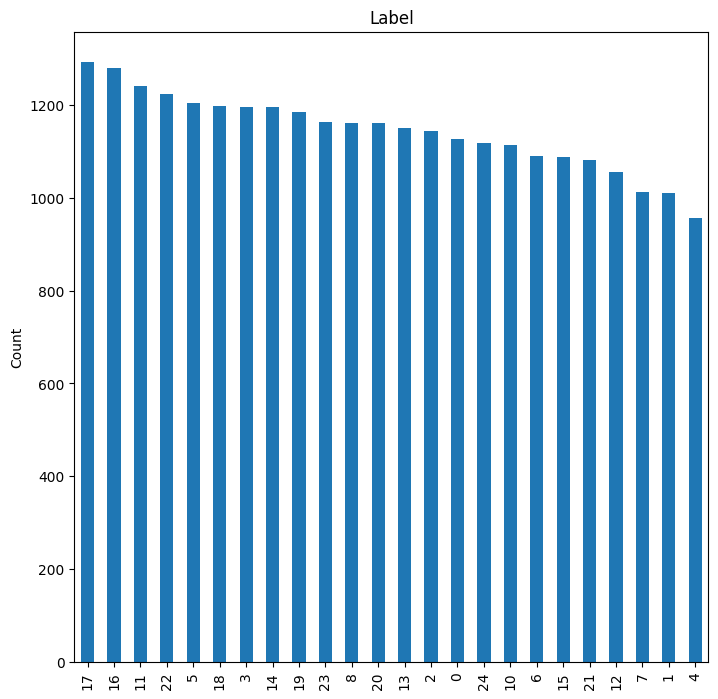

In [7]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [8]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [9]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

In [10]:
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [11]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

##Model

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


In [13]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [14]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [15]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat), callbacks = [checkpoint])



Epoch 1/10
215/215 [==============================] - ETA: 0s - loss: 2.5681 - acc: 0.2145

215/215 [==============================] - 57s 241ms/step - loss: 2.5681 - acc: 0.2145 - val_loss: 1.2878 - val_acc: 0.5842
Epoch 2/10
215/215 [==============================] - ETA: 0s - loss: 1.0323 - acc: 0.6522

215/215 [==============================] - 34s 159ms/step - loss: 1.0323 - acc: 0.6522 - val_loss: 0.5073 - val_acc: 0.8474
Epoch 3/10
215/215 [==============================] - ETA: 0s - loss: 0.5857 - acc: 0.7992

215/215 [==============================] - 36s 168ms/step - loss: 0.5857 - acc: 0.7992 - val_loss: 0.2608 - val_acc: 0.9293
Epoch 4/10
215/215 [==============================] - ETA: 0s - loss: 0.3916 - acc: 0.8673

215/215 [==============================] - 39s 181ms/step - loss: 0.3916 - acc: 0.8673 - val_loss: 0.1512 - val_acc: 0.9657
Epoch 5/10
215/215 [==============================] - ETA: 0s - loss: 0.2656 - acc: 0.9111

215/215 [==============================] - 36s 169ms/step - loss: 0.2656 - acc: 0.9111 - val_loss: 0.0701 - val_acc: 0.9921
Epoch 6/10
215/215 [==============================] - ETA: 0s - loss: 0.1887 - acc: 0.9391

215/215 [==============================] - 34s 156ms/step - loss: 0.1887 - acc: 0.9391 - val_loss: 0.0406 - val_acc: 0.9966
Epoch 7/10
215/215 [==============================] - ETA: 0s - loss: 0.1418 - acc: 0.9548

215/215 [==============================] - 36s 166ms/step - loss: 0.1418 - acc: 0.9548 - val_loss: 0.0250 - val_acc: 0.9985
Epoch 8/10
215/215 [==============================] - ETA: 0s - loss: 0.1108 - acc: 0.9657

215/215 [==============================] - 38s 176ms/step - loss: 0.1108 - acc: 0.9657 - val_loss: 0.0186 - val_acc: 0.9988
Epoch 9/10
215/215 [==============================] - ETA: 0s - loss: 0.0937 - acc: 0.9708

215/215 [==============================] - 35s 161ms/step - loss: 0.0937 - acc: 0.9708 - val_loss: 0.0098 - val_acc: 0.9996
Epoch 10/10
215/215 [==============================] - ETA: 0s - loss: 0.0767 - acc: 0.9749

215/215 [==============================] - 36s 166ms/step - loss: 0.0767 - acc: 0.9749 - val_loss: 0.0060 - val_acc: 1.0000


In [16]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


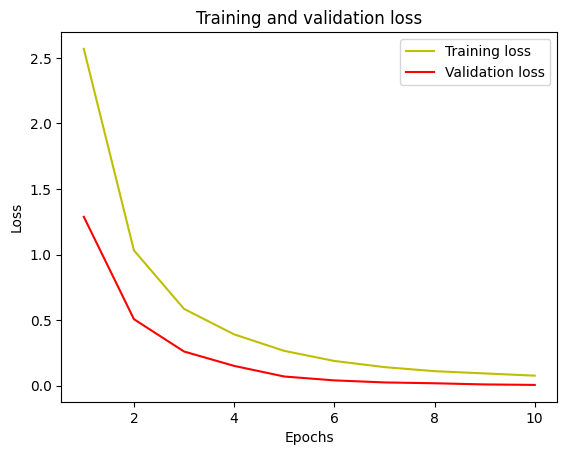

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

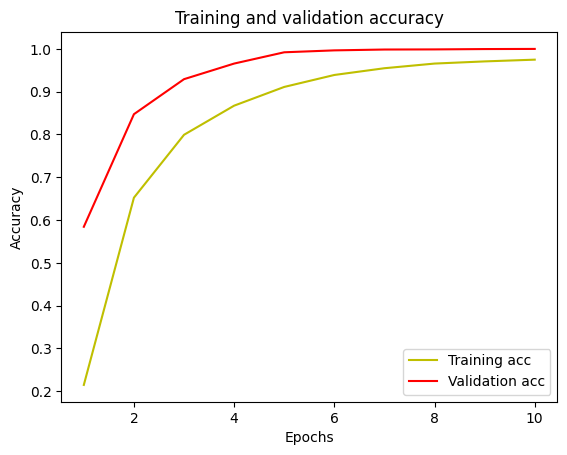

In [19]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
predictions = model.predict(X_test)
prediction = np.argmax(predictions, axis=1)

858/858 [==============================] - 10s 12ms/step


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Accuracy Score = ', accuracy)

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy Score =  0.9999635767619741


Predicted Label:  W
True Label:  W


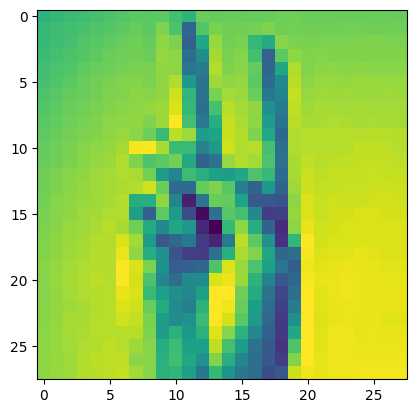

In [22]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0])
print("Predicted Label: ", categories[int(prediction[i])])
print("True Label: ", categories[int(y_test[i])])

<Axes: >

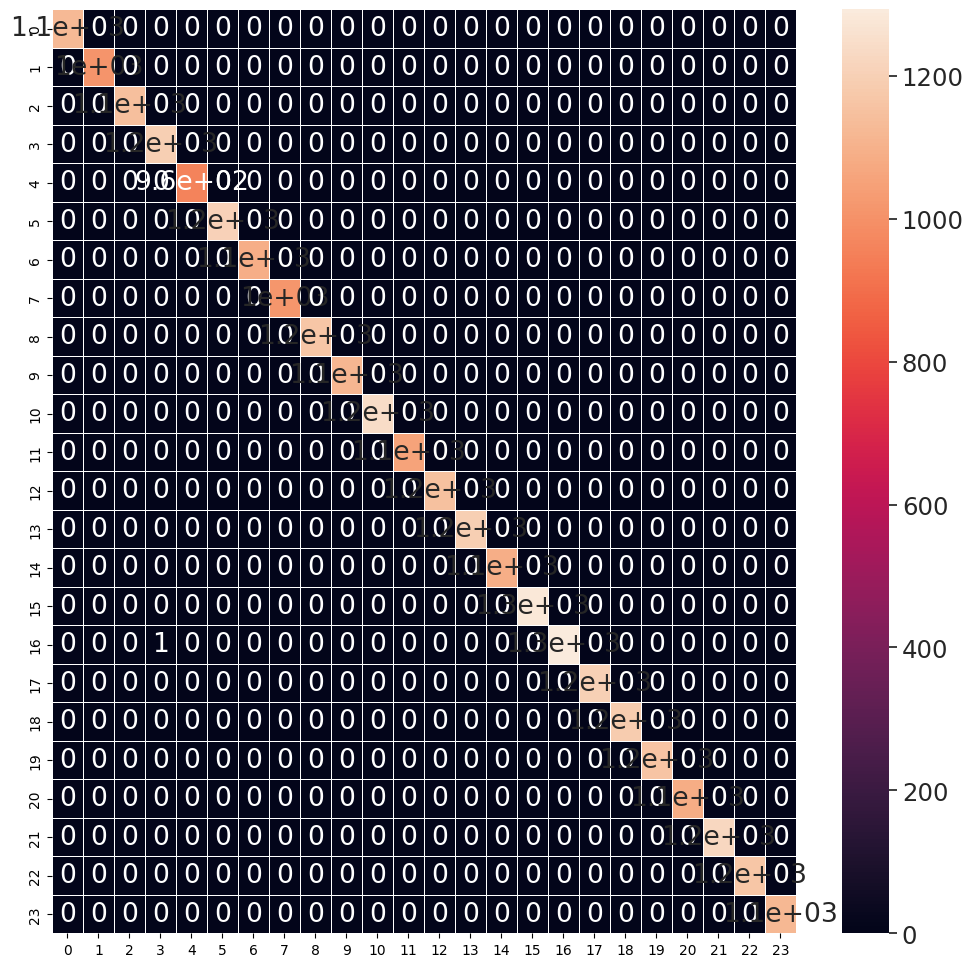

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(len(categories)), categories, rotation=90)